In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import numpy as np
import cv2 as cv
import mediapipe as mp
import numpy as np
from keras.utils import to_categorical

Import the data and labels, then split into training and testing.

Note that there are many different files here, this is because I processed each video separately, then saved the data in individual files, I combine them all and shuffle them below. (Probably should improve this at some point).

In [21]:
X1 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Data0.npy')
y1 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Labels0.npy')
X2 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Data1.npy')
y2 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Labels1.npy')
X3 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Data2.npy')
y3 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Labels2.npy')
X4 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Data3.npy')
y4 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Labels3.npy')
X5 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Data4.npy')
y5 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Labels4.npy')
X6 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Data5.npy')
y6 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Labels5.npy')
X7 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Data6.npy')
y7 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Labels6.npy')
X8 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Data7.npy')
y8 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 1\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Training Data\\Labels7.npy')


X = np.concatenate((X1,X2,X3,X4,X5,X7,X8), axis=0)
y = np.concatenate((y1,y2,y3,y4,y5,y7,y8), axis=0)

# mask = [True,True,False,True,True,False]
# X[:,:,1], X[:,:,4] = X[:,:,3], X[:,:,5]
perm = np.random.permutation(X.shape[0])
y = y[perm]
X = X[perm]

X.shape

(2192, 10, 6)

Now build the GRU model.

In [22]:
model_gru = Sequential()
model_gru.add(GRU(100, return_sequences=True))
# model_gru.add(GRU(50, return_sequences=True))
model_gru.add(GRU(50))
model_gru.add(Dense(3, activation='softmax'))

Compile and train the model

In [23]:
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_gru.fit(X,y, epochs=100, batch_size=20)

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7472 - loss: 0.6204
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9329 - loss: 0.1637
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9467 - loss: 0.1507
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9453 - loss: 0.1358
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9511 - loss: 0.1316
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9504 - loss: 0.1258
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9489 - loss: 0.1309
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9604 - loss: 0.1185
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9559 - loss: 0.1100
Epoch 10/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9410 - loss: 0.1355
Epoch 11/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9581 - loss: 0.1017
Epoch 12/100
110/110 ━━━━━━━━━━━━━━━━━━━━

In [32]:
model_gru.save("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Classification\\Bicep Curl\\Detailed Exercise Classification\\Models\\Detailed_Exercise_Classification.h5")

# Processing Unseen Video
Note that the processing below is not described very well, this is because it is an exact copy of the code from the file named "Data preparation" which is within the same folder as this document.

In [24]:
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions import detectPose, extract_angles, moving_average

In [25]:
path = "C:\\Users\\Cian\\OneDrive\\Documents\\Imperial\\Year 4\\FYP\\Local Download\\Technical\\Bicep Curl Analysis\\Classification\\Training Data (Videos)\\Detailed Exercise Classification\\Testing 5.mp4"
Angles = extract_angles(path)

In [26]:
window_size = 15
angles = np.copy(Angles)
angles[:,0], angles[:,1], angles[:,2] = moving_average(Angles[:,0], window_size), moving_average(Angles[:,1], window_size), moving_average(Angles[:,2], window_size)

In [27]:
dt = 1/15
ang_vel = (angles[2:,:]-angles[:-2,:])/(2*dt)
#normalize the angles (however think of a better way to do this)
ang_vel = ang_vel/np.max(ang_vel)

In [28]:
#Now moving average.
window_size1 = 11
Vel = np.copy(ang_vel)
Vel[:,0], Vel[:,1], Vel[:,2] = moving_average(ang_vel[:,0], window_size1), moving_average(ang_vel[:,1], window_size1), moving_average(ang_vel[:,2], window_size1)

In [29]:
ang = angles[1:-1]

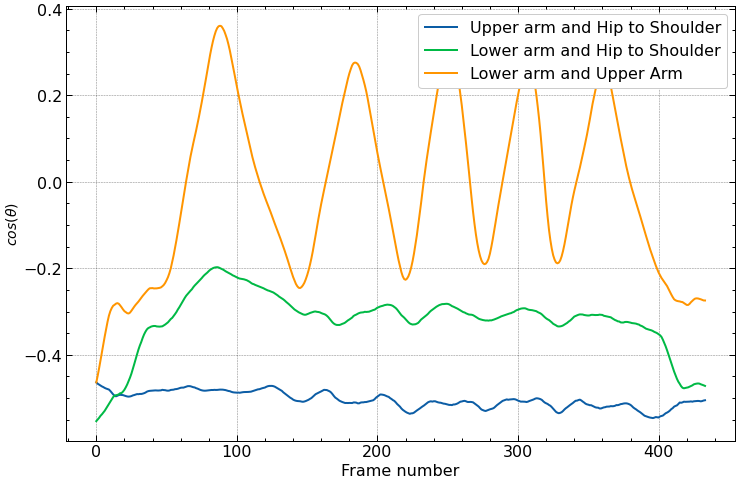

In [30]:
import matplotlib.pyplot as plt
o = np.arange(0,len(ang),1)
plt.figure(figsize=(12,8))
plt.plot(o,ang[:,0],label='Upper arm and Hip to Shoulder')
plt.plot(o,ang[:,1], label='Lower arm and Hip to Shoulder')
plt.plot(o,ang[:,2], label = 'Lower arm and Upper Arm')
plt.xlabel('Frame number')
plt.ylabel(r'$cos(\theta)$', fontsize = 14)
plt.legend()

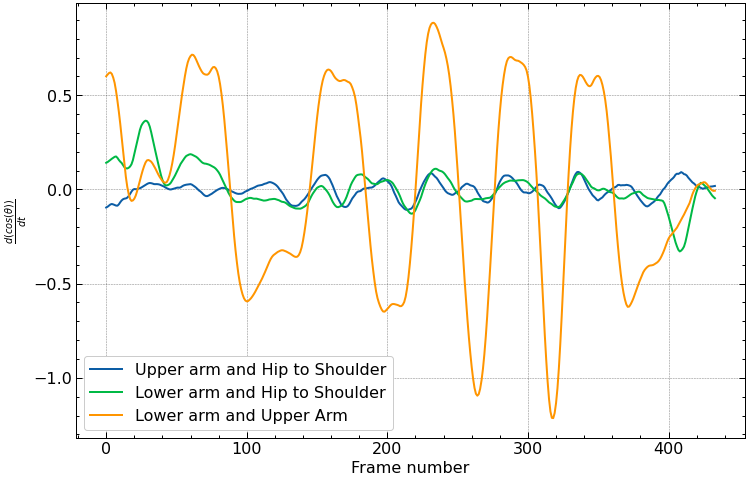

In [31]:
o = np.arange(0,len(ang),1)
plt.figure(figsize=(12,8))
plt.plot(o,Vel[:,0],label='Upper arm and Hip to Shoulder')
plt.plot(o,Vel[:,1], label='Lower arm and Hip to Shoulder')
plt.plot(o,Vel[:,2], label = 'Lower arm and Upper Arm')
plt.xlabel('Frame number')
plt.ylabel(r'$\frac{d(cos(\theta))}{dt}$', fontsize = 14)
plt.legend()

In [32]:
final_data = np.concatenate((ang, ang_vel), axis=1)

In [33]:
X = 10
sequences = np.zeros((final_data.shape[0]-X, X, 6))
for i in range(X,final_data.shape[0]):
    sequences[i-X] = final_data[i-X:i]

Make a prediction for every frame in the unseen video.

In [34]:
res = model_gru.predict(sequences)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Apply a moving average to the results (reason is described in my log on page 12).

In [35]:
res_avg = np.copy(res)
Window_Size = 9
res_avg[:,0],res_avg[:,1],res_avg[:,2]= moving_average(res[:,0],Window_Size),moving_average(res[:,1],Window_Size),moving_average(res[:,2],Window_Size)

Plot the probability of each class before and after the smoothing.

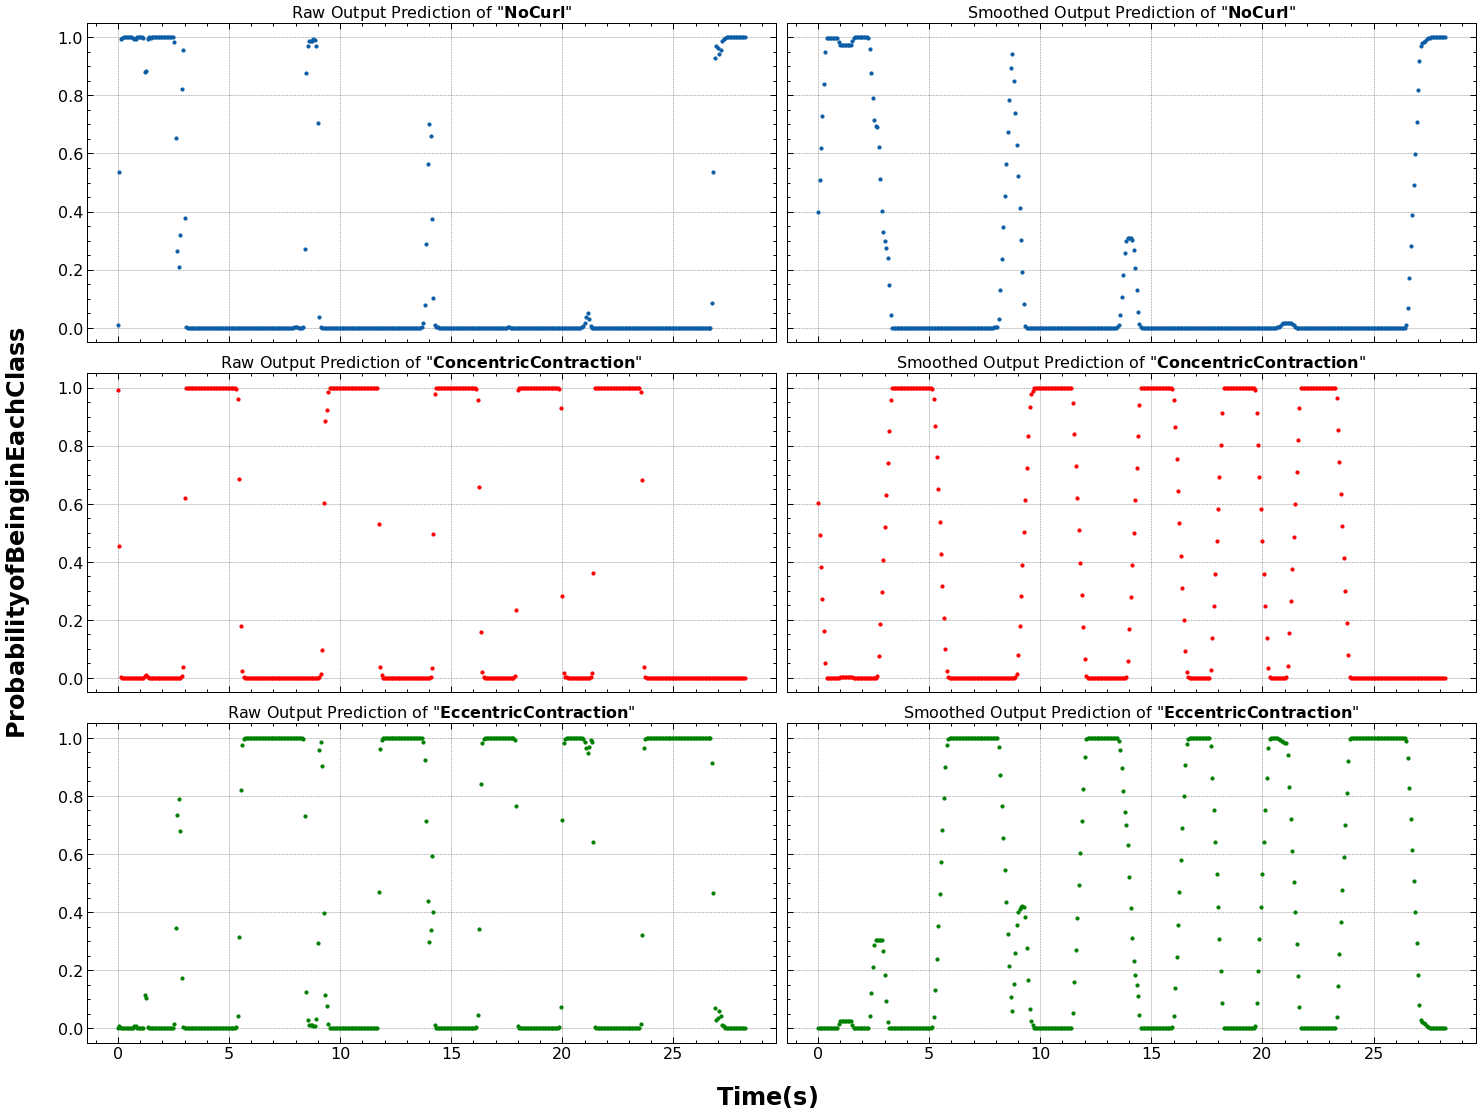

In [36]:
plt.style.use(['science', 'notebook', 'grid'])
t = np.arange(0,len(res),1)/15

fig, axs = plt.subplots(3, 2, figsize=(20, 15), sharey=True, sharex=True)
axs[0, 1].scatter(t, res_avg[:,0], s=10)
axs[0, 0].scatter(t, res[:,0], s=10)
axs[1, 1].scatter(t, res_avg[:,1], s=10,c='red')
axs[1, 0].scatter(t, res[:,1], s=10,c='red')
axs[2, 1].scatter(t, res_avg[:,2], s=10,c='green')
axs[2, 0].scatter(t, res[:,2], s=10,c='green')

axs[0,0].set_title(r'Raw Output Prediction of "$\bf{No Curl}$"')
axs[0,1].set_title(r'Smoothed Output Prediction of "$\bf{No Curl}$"')
axs[1,0].set_title(r'Raw Output Prediction of "$\bf{Concentric Contraction}$"')
axs[1,1].set_title(r'Smoothed Output Prediction of "$\bf{Concentric Contraction}$"')
axs[2,0].set_title(r'Raw Output Prediction of "$\bf{Eccentric Contraction}$"')
axs[2,1].set_title(r'Smoothed Output Prediction of "$\bf{Eccentric Contraction}$"')

fig.text(-0.03, 0.5, r'$\bf{Probability of Being in Each Class}$', va='center', rotation='vertical', fontsize=24)
fig.text(0.5, -0.03, r'$\bf{Time (s)}$', ha='center', fontsize=24)
plt.tight_layout()
plt.savefig('C:\\Users\\Cian\\Downloads\\FIG.png')

In [37]:
choice = np.round(res_avg)
change = choice[1:]*choice[:-1]
C = np.where(np.sum((change == np.array([0,0,0])), axis=1) == 3)[0]*dt
C

array([ 0.        ,  2.8       ,  2.86666667,  2.93333333,  5.46666667,
        8.4       ,  9.        ,  9.06666667,  9.13333333,  9.2       ,
       11.73333333, 14.        , 14.06666667, 14.13333333, 16.26666667,
       17.93333333, 19.93333333, 21.4       , 23.6       , 26.8       ])